In [ ]:
import pandas as pd

df = pd.read_csv("C:\\Users\\corpd\\Downloads\\customer_data.csv")

print("Preview of customer_data.csv:")
df.head()


Preview of customer_data.csv:


,Customer ID,Age,Annual Income,Spending Score
0,1,25,50000,39
1,2,34,64000,81
2,3,22,32000,6
3,4,45,85000,77
4,5,36,58000,40


In [ ]:



print("Shape of the dataset:", df.shape)


print("\nMissing values in each column:")
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


print("\nData types of each column:")
print(df.dtypes)


print("\nSummary statistics:")
print(df.describe())


Shape of the dataset: (5, 4)

Missing values in each column:
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Number of duplicate rows: 0

Data types of each column:
Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

Summary statistics:
       Customer ID        Age  Annual Income  Spending Score
count     5.000000   5.000000        5.00000        5.000000
mean      3.000000  32.400000    57800.00000       48.600000
std       1.581139   9.181503    19395.87585       30.972569
min       1.000000  22.000000    32000.00000        6.000000
25%       2.000000  25.000000    50000.00000       39.000000
50%       3.000000  34.000000    58000.00000       40.000000
75%       4.000000  36.000000    64000.00000       77.000000
max       5.000000  45.000000    85000.00000       81.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

features = df[["Age", "Annual Income", "Spending Score"]]


scaler = StandardScaler()


scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


print("Standardized Feature Values:")
print(scaled_df.head())


Standardized Feature Values:
        Age  Annual Income  Spending Score
0 -0.901100      -0.449614       -0.346537
1  0.194832       0.357386        1.169561
2 -1.266411      -1.487186       -1.537756
3  1.534305       1.567886        1.025171
4  0.438373       0.011529       -0.310439


Scaled Features Shape: (5, 3)
Any NaNs in scaled features? False


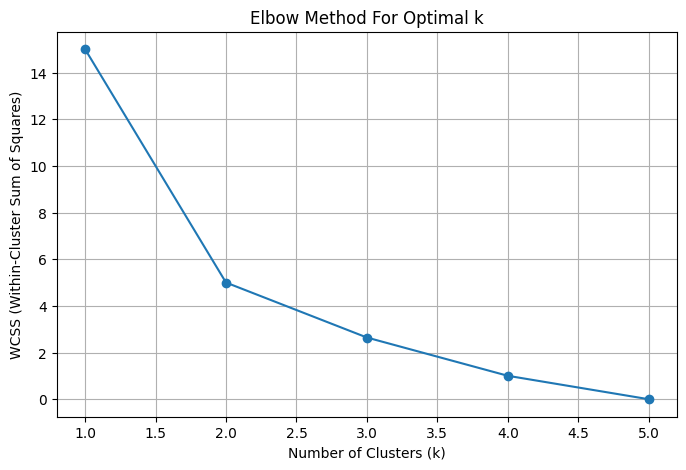


Customer data with cluster labels:
   Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   25          50000              39        2
1            2   34          64000              81        0
2            3   22          32000               6        1
3            4   45          85000              77        0
4            5   36          58000              40        2


In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt




features = df[["Age", "Annual Income", "Spending Score"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


print("Scaled Features Shape:", scaled_features.shape)
print("Any NaNs in scaled features?", pd.DataFrame(scaled_features).isnull().values.any())


K = range(1, 6)  
wcss = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()




optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans_final.fit_predict(scaled_features)


print("\nCustomer data with cluster labels:")
print(df)


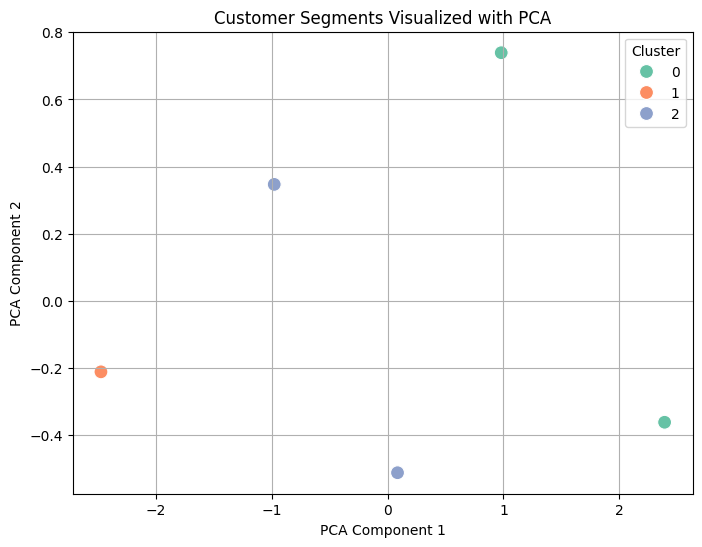

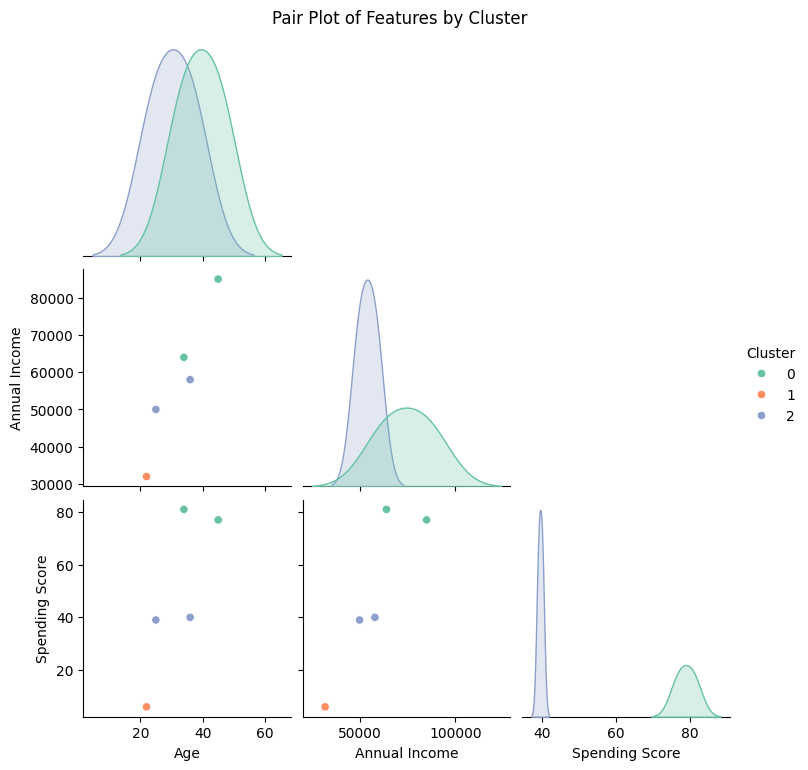

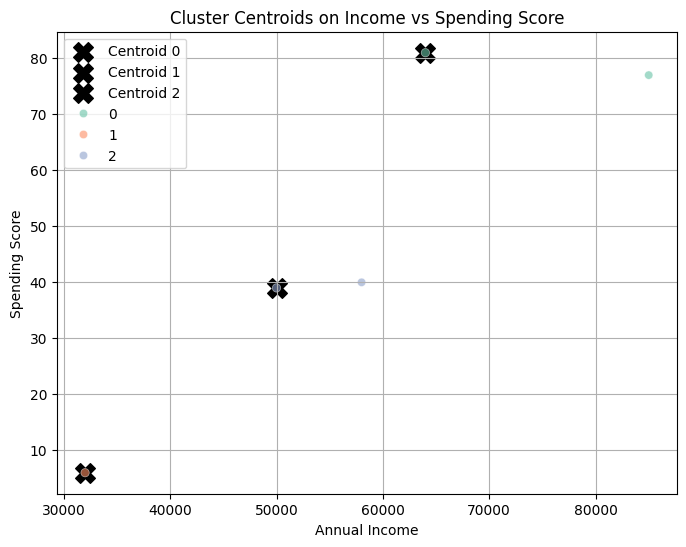

In [ ]:

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)


df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


sns.pairplot(df[["Age", "Annual Income", "Spending Score", "Cluster"]], hue="Cluster", palette="Set2", corner=True)
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

centroids_df = pd.DataFrame(centroids_original, columns=["Age", "Annual Income", "Spending Score"])
centroids_df["Cluster"] = range(len(centroids_df))



plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(centroids_df.loc[i, "Annual Income"],
                centroids_df.loc[i, "Spending Score"],
                marker='X', s=200, c='black', label=f'Centroid {i}')

sns.scatterplot(data=df, x="Annual Income", y="Spending Score", hue="Cluster", palette="Set2", alpha=0.6)
plt.title("Cluster Centroids on Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

df["Cluster"] = kmeans.labels_

print("Clustered Customer Data:")
print(df)


df.to_csv("clustered_customer_data.csv", index=False)
print("\nClustered data has been saved to 'clustered_customer_data.csv'")



Clustered Customer Data:
   Customer ID  Age  Annual Income  Spending Score  Cluster      PCA1  \
0            1   25          50000              39        2 -0.980115   
1            2   34          64000              81        0  0.980381   
2            3   22          32000               6        1 -2.476502   
3            4   45          85000              77        3  2.391423   
4            5   36          58000              40        4  0.084813   

       PCA2  
0  0.346885  
1  0.739295  
2 -0.211753  
3 -0.362024  
4 -0.512403  

Clustered data has been saved to 'clustered_customer_data.csv'


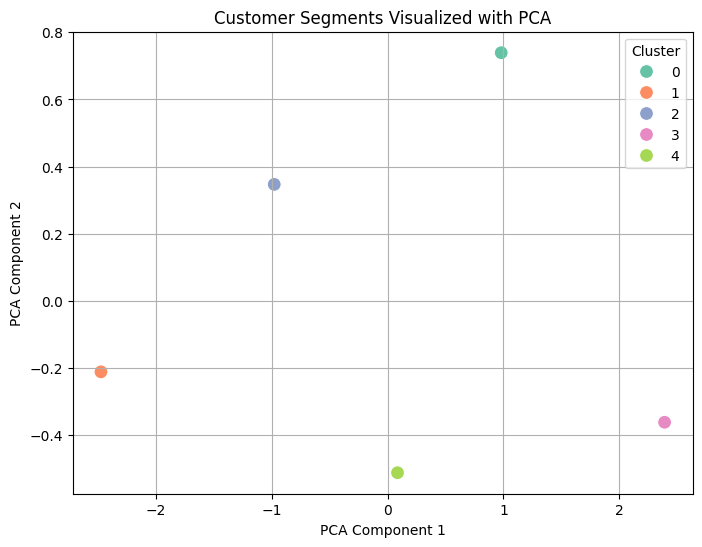

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


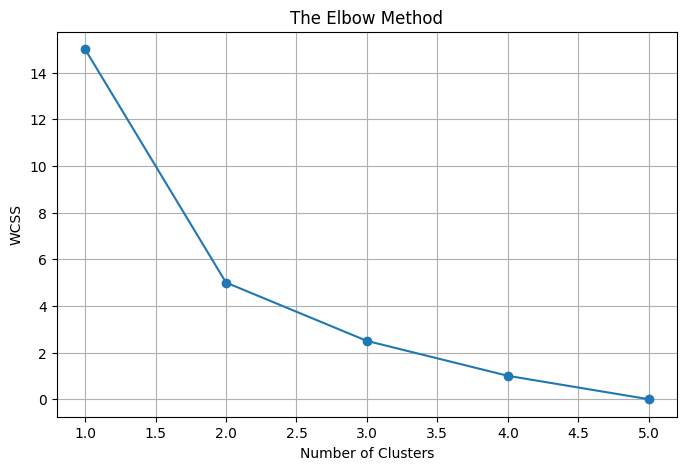

In [ ]:

wcss = []
K_range = range(1, 6)  
for i in K_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


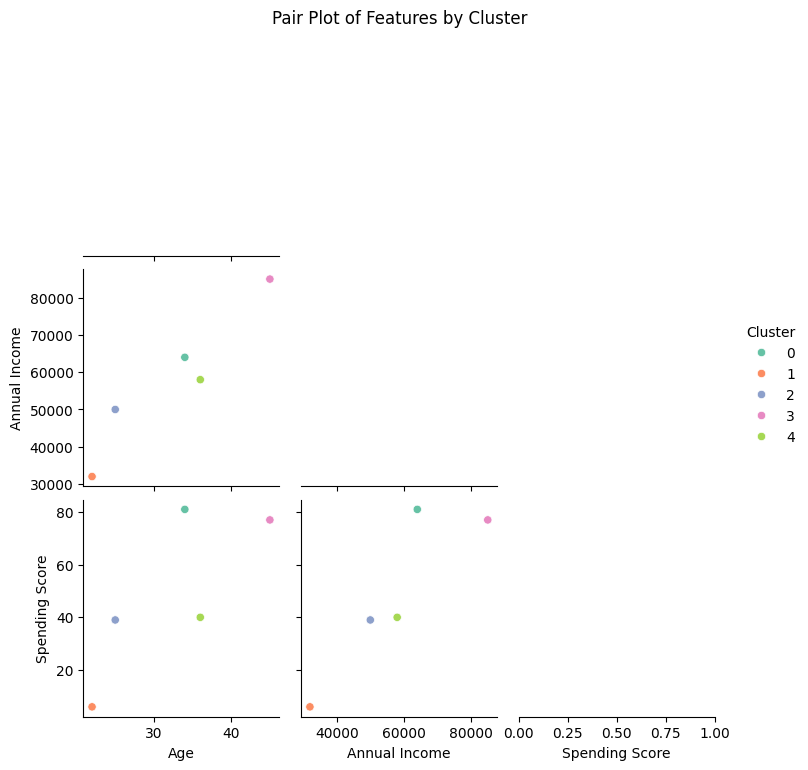

In [12]:
sns.pairplot(df[["Age", "Annual Income", "Spending Score", "Cluster"]], hue="Cluster", palette="Set2", corner=True)
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()
